In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('Q:\\python\\lib')
import Sun
import AIA
from hydro import *
from pyfield import *

In [14]:
nx = 100
nt = int(1e5)
L = 1e8

idx = np.arange(0,nx).astype(np.double)/(nx-1.)
X = np.zeros((nx,2), dtype = np.double)
Xi = np.zeros((nx,2), dtype = np.double)

X[:,0] = np.cos(idx*np.pi, dtype = np.double)*L
X[:,1] = np.sin(idx*np.pi, dtype = np.double)*L



for i in range(0,2):
    Xi[:,i] = 0.5*(X[:,i] + np.roll(X[:,i],1))
         

ds = np.sqrt(np.sum([d(X[:,i])**2 for i in range(0,2)],0))
dsi = np.sqrt(np.sum([(np.roll(Xi[:,i],-1)-Xi[:,i])**2 for i in range(0,2)],0))           
d2s = np.sum([d(X[:,i])*d(X[:,i],2) for i in range(0,2)],0)/ds


cfl = 0.1
gamma = 5./3
m = Sun.mu_c*Sun.m_p
k_b = Sun.k_b

rho = np.zeros((nx,nt+1), dtype = np.double)
rhou = np.zeros((nx,nt+1), dtype = np.double)
rhoe = np.zeros((nx,nt+1), dtype = np.double)

time = np.zeros(nt+1, dtype = np.double)
dg = 0.3

rho[:,0] = np.ones(nx, dtype = np.double)*1e9*m
#rho[:,0] = (1. - 0.99*np.sin(idx*np.pi))*5e11*m
#rho[:,0] = (1. - 0.9*np.exp(-(idx-0.5)**2/dg**2))*1e10*m
#T = 1e4 + 1e4*np.sin(idx*np.pi)
#T = np.ones(nx)*1e4
#T[nx/2] = 1e5
T = 1e4 + 5e4*np.exp(-(idx-0.5)**2/0.15**2)

rhoe[:,0] = 3*rho[:,0]/m*k_b*T

rho0 = np.array(rho[:,0])
rhou0 = np.array(rhou[:,0])
rhoe0 = np.array(rhoe[:,0])

qrho = np.array(rho[:,0])
qrhou = np.array(rhou[:,0])
qrhoe = np.array(rhoe[:,0])

for it in range(1,nt+1):    
    u = qrhou/qrho
    etot = qrhoe/qrho
    ekin = u**2/2
    eth = etot-ekin
    T = (eth*m/(3*Sun.k_b)).clip(min=1e3)
    
    cs = np.sqrt(gamma*(gamma-1)*eth.clip(min=0))
    dum = np.min((ds/(cs+np.abs(u)+1))[1:nx-1])
    trad = np.min((1./((qrho/m)**2*1.9e-22))[1:nx-1])
    tcon = np.min(np.abs(ds**2/(2*Sun.kappa*T**2.5*m/(3*Sun.k_b)/qrho))[1:nx-1])
    
    #dt = cfl*np.min([dum,tcon,trad])
    dt = 1e-6
    time[it] = time[it-1]+dt
    hydrostep(ds,dsi,d2s,qrho,qrhou,qrhoe,gamma,dt, 'mirror')
    
    rho[:,it] = qrho
    rhou[:,it] = qrhou
    rhoe[:,it] = qrhoe

1.24188274 14.3860915485 5263.15733631 30125.7174436


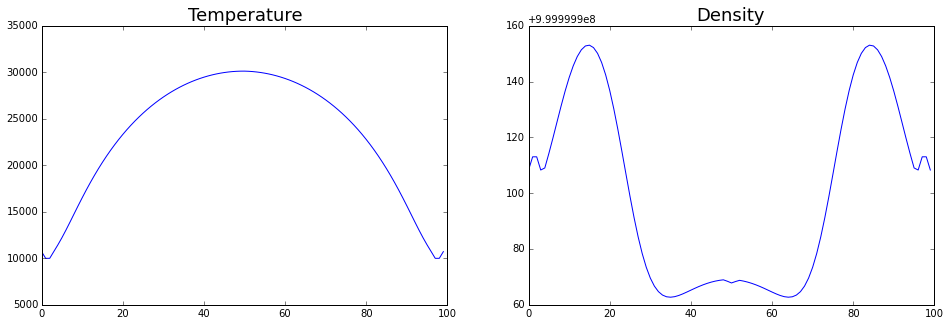

In [13]:
T = eth*m/(3*Sun.k_b)
print dum, tcon, trad, np.max(T)
n = qrho/m
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Temperature', size = 18)
plt.plot(T)
plt.subplot(122)
plt.title('Density', size = 18)
plt.plot(n)

In [14]:
def f(x):
    out = np.array([0.1*x[0]-x[1],0.1*x[1]+x[0]]).T
    #out /= np.sqrt(out[0]**2+out[1]**2)
    return out

x0 = np.array([1.,1.]).T

x = x0
step = 0.1

for i in range(0,100):
    f1 = f(x0)
    x1 = x0 + step*f1
    f2 = f(x1)
    x0 += 0.5*step*(f1+f2)
    x = np.column_stack((x,x0))


In [3]:
alpha = 4./11
p = 2*1e9*Sun.k_b*1e6
lam = 2e-22

A = ((p/(2*Sun.k_b))**2*lam/Sun.kappa/(3.5*alpha**2-alpha))**(2./11)

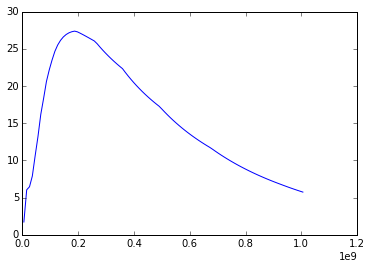

In [12]:
N = 100
L = 1e9
s = (np.arange(0,N).astype(np.float32)+0.5)/(N-1)*L

T = A*s**alpha
n = p/(2*Sun.k_b*T)

plt.plot(s, n**2*AIA.t171(T)*1e7)

In [7]:
np.max(rhoe0)

0.0041421000000000001